In [1]:
# imports and loading
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import pickle
import numpy as np

# load in a bunch of potentially useful files
# loading merged log_tpm_file
# merge together log_tpm_df files
log_tpm_df = pd.read_csv('../data/precise_1k/corrected/PRECISE_1K_log_tpm_basal.csv', index_col = 0)
starve_log_tpm = pd.read_csv('../data/validation_data_sets/stationary_phase/cleaned_log_tpm_qc.csv', index_col = 0)
to_blank_inds = list(set(log_tpm_df.index) - set(starve_log_tpm.index))
# need to create zero rows for missing values
zeros_data = {col : 0 for col in starve_log_tpm.columns}
zeros_df = pd.DataFrame(zeros_data, index = to_blank_inds)
starve_log_tpm = pd.concat([starve_log_tpm, zeros_df])
starve_log_tpm = starve_log_tpm.loc[log_tpm_df.index]
log_tpm_df = pd.concat([starve_log_tpm, log_tpm_df], axis = 1)
precise_log_tpm_df = pd.read_csv('../data/precise_1k/corrected/PRECISE_1K_log_tpm_basal.csv', index_col = 0)

flags_df = pd.read_csv('../data/saved_flags.csv', index_col = 0)
saved_flags = flags_df

iM_to_genes = {}
gene_to_iMs = {}
k_to_iM = {}
f = open('../data/precise_1k/iM_table.csv', 'r')
lines = f.readlines()
f.close()
k_to_iM = {line.split(',')[0] : line.split(',')[1] for line in lines[1:]}
iM_to_regulator = {line.split(',')[1] : line.split(',')[2] for line in lines[1:]}
f = open('../data/precise_1k/corrected/gene_presence_matrix.csv', 'r')
lines = f.readlines()
f.close()

gene_presence_df = pd.read_csv('../data/precise_1k/corrected/gene_presence_matrix.csv', index_col = 0)
gene_presence_df = gene_presence_df.rename(columns = k_to_iM)
for gene in gene_presence_df.index:
    iMs_gene_in = gene_presence_df.columns[gene_presence_df.loc[gene] == True].to_list()
    for iM in iMs_gene_in:
        if iM not in iM_to_genes:
            iM_to_genes.update({iM : []})
        iM_to_genes[iM].append(gene)
        if gene not in gene_to_iMs:
            gene_to_iMs.update({gene : []})
        gene_to_iMs[gene].append(iM)
    
A = pd.read_csv('../data/precise_1k/corrected/PRECISE_1K_A_basal.csv', index_col = 0).rename(index = {int(k) : v for k, v in k_to_iM.items()})
all_A = pd.read_csv('../data/validation_data_sets/merged_A.csv', index_col = 0)
M = pd.read_csv('../data/precise_1k/corrected/PRECISE_1K_M_basal.csv', index_col = 0).rename(columns = k_to_iM)

TRN_df = pd.read_pickle('../data/regulonDB_files/TRN_df.pkl') # TRN_df.loc[regulator][target] = 1 means regulator regulates target

pickle_in = open('../data/b_to_gene.pkl', 'rb')
b_to_gene = pickle.load(pickle_in)
pickle_in.close()
gene_to_b = {v : k for k, v in b_to_gene.items()}
gene_to_b.update({'ntrC' : 'b3868'})
iM_to_b_regulator = {
    'GlpR' : ['b3423'], 
    'DhaR/Mlc' : ['b1201', 'b1594'], 
    'ArgR' : ['b3237'], 
    'NarL' : ['b1221'], 
    'MalT' : ['b3418'], 
    'OxyR' : ['b3961'], 
    'Crp-2' : ['b3357'], 
    'AtoC' : ['b2220'], 
    'PurR-1' : ['b1658'], 
    'CsqR' : ['b3884'], 
    'MetJ' : ['b3938'], 
    'PurR-2' : ['b1658'], 
    'Cbl+CysB' : ['b1987' 'b1275'], 
    'GlcC' : ['b2980'], 
    'Crp-1' : ['b3357'], 
    'YiaJ' : ['b3574'], 
    'GcvA' : ['b2808'], 
    'XylR' : ['b3569'], 
    'RpoH' : ['b3461'], 
    'GadEWX' : ['b3512', 'b3515', 'b3516'], 
    'PrpR' : ['b0330'], 
    'GadWX' : ['b3516', 'b3515'], 
    'CecR' : ['b0796'], 
    'ArcA-1' : ['b4401'], 
    'Fnr' : ['b1334'], 
    'CdaR' : ['b0162'], 
    'Pyruvate' : ['b2125', 'b2381', 'b0113'], 
    'SrlR+GutM' : ['b2707', 'b2706'], 
    'NagC/TyrR' : ['b0676', 'b1323'], 
    'CpxR' : ['b3912'], 
    'Lrp' : ['b0889'], 
    'Leu/Ile' : ['b3773'], 
    'Fur-1' : ['b0683'], 
    'CysB' : ['b1275'], 
    'FliA' : ['b1922'], 
    'PuuR' : ['b1299'], 
    'NikR' : ['b3481'], 
    'NtrC+RpoN' : ['b3868', 'b3202'], 
    'RcsAB' : ['b1951', 'b2217'], 
    'Fur-2' : ['b0683'], 
    'Copper' : ['b0571', 'b1969', 'b0487'], 
    'AllR/AraC/FucR' : ['b0506', 'b0064', 'b2805'], 
    'Cra' : ['b0080'], 
    'ArcA-2' : ['b4401'], 
    'EvgA' : ['b2369'], 
    'Zinc' : ['b3292', 'b4046'], 
    'SoxS' : ['b4062'], 
    'Nac' : ['b1988'], 
    'Tryptophan' : ['b4393'], 
    'FadR/IclR' : ['b1187', 'b4018'], 
    'FlhDC' : ['b1892', 'b1891'], 
    'GntR/TyrR' : ['b3438', 'b1323'], 
    'RpoS' : ['b2741'], 
    'ExuR/FucR' : ['b3094', 'b2805'], 
    'FecI' : ['b4293'], 
    'RbsR' : ['b3753']
}
iM_to_b_regulator = {}
iM_table = pd.read_csv('../data/precise_1k/iM_table.csv', index_col = 0)
for index, row in iM_table.iterrows():
    iM = row['name']
    regulator = row['regulator_readable']
    if type(regulator) == float or len(regulator) > 6:
        continue
    regulator = regulator[0].lower()+regulator[1:]
    if regulator == 'flhDC':
        regulator = 'flhD'
    if regulator == 'rcsAB':
        regulator = 'rcsA'
    if regulator == 'ppGpp':
        continue
    b = gene_to_b[regulator]
    iM_to_b_regulator.update({iM : [b]})
iM_to_b_regulator.update({'Purine' : ['b1658']})
iM_to_b_regulator.update({'DhaR' : ['b1201', 'b1594']})

In [2]:
# find iMs
iM_reg_df = pd.DataFrame(index = log_tpm_df.index)
promoters = []
inhibitors = []
for gene in iM_reg_df.index:
    # need to decide if iM is repressor or promoter
    if gene not in gene_to_iMs:
        promoters.append([])
        inhibitors.append([])
        continue # gene not in iModulons, move on
    proms = []
    inhs = []
    for iM in gene_to_iMs[gene]:
        # need to decide if a given iModulon is a promoter or inhibitor of the gene
        pass
        # need to do this, but here's how I think I tell
        # positive gene weight and positive correlation between regulator and iM = promoter
        # negative gene weight and positive correlation between regulator and iM = inhibitor
        # positive gene weight and negative correlation between regulator and iM = inhibitor
        # negative gene weight and negative correlation between regulator and iM = promoter
        # so I need the regulator name don't I... maybe it's easier to just go through them manually as that'll be quicker than connecting all of these together
        

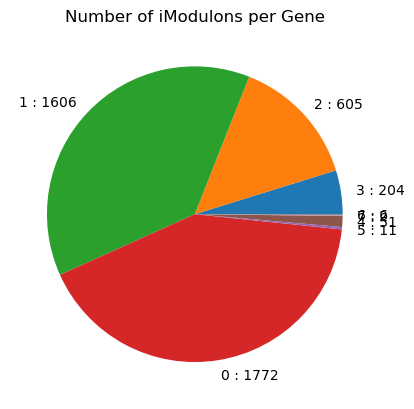

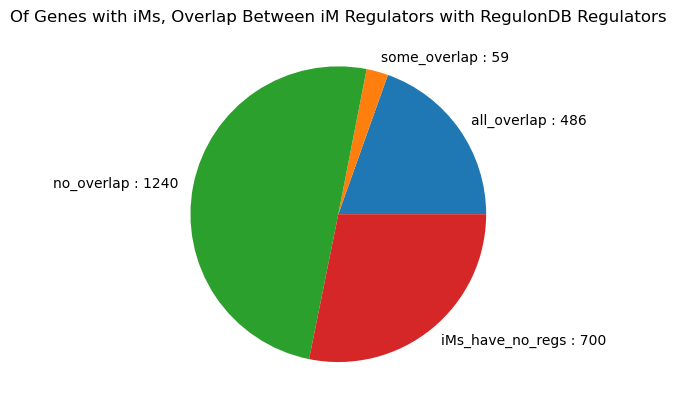

In [3]:
# pies!

num_iMs_to_ct = {}
for gene in log_tpm_df.index:
    if gene not in gene_to_iMs:
        num_iMs = 0
    else:
        num_iMs = len(gene_to_iMs[gene])
    if num_iMs not in num_iMs_to_ct:
        num_iMs_to_ct.update({num_iMs : 0})
    num_iMs_to_ct[num_iMs] += 1

plt.pie(num_iMs_to_ct.values(), labels = [str(k)+' : '+str(v) for k, v in num_iMs_to_ct.items()])
plt.title('Number of iModulons per Gene')
plt.savefig('../figures/gene_iM_ct.pdf', transparent = True)
plt.show()

# out of genes with iModulons, how many are actually regulated by the iM's regulators?
all_overlap = []
some_overlap = []
no_overlap = []
iMs_have_no_regs = []
for gene, iMs in gene_to_iMs.items():
    if gene not in TRN_df.columns:
        no_overlap.append(gene)
    else:
        regs = TRN_df.index[TRN_df[gene] != 0].to_list()
        overlapped = 0
        iMs_have_regs = 0
        for iM in iMs:
            if iM not in iM_to_b_regulator:
                continue
            iMs_have_regs += 1
            if len(set(iM_to_b_regulator[iM]).intersection(regs)) > 0:
                overlapped += 1
        if iMs_have_regs == 0:
            iMs_have_no_regs.append(gene)
        elif iMs_have_regs == overlapped:
            all_overlap.append(gene)
        elif overlapped == 0:
            no_overlap.append(gene)
        else:
            some_overlap.append(gene)
labels = [
    'all_overlap : '+str(len(all_overlap)),
    'some_overlap : '+str(len(some_overlap)),
    'no_overlap : '+str(len(no_overlap)),
    'iMs_have_no_regs : '+str(len(iMs_have_no_regs)),
]
plt.pie([len(all_overlap), len(some_overlap), len(no_overlap), len(iMs_have_no_regs)], labels = labels)
plt.title('Of Genes with iMs, Overlap Between iM Regulators with RegulonDB Regulators')
plt.savefig('../figures/gene_iM_overlap.pdf', transparent = True)
plt.show()

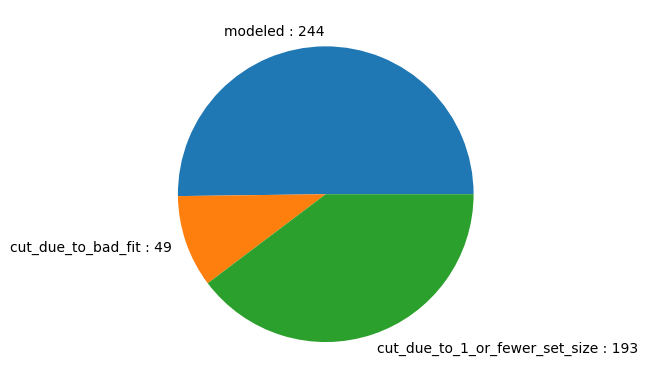

In [18]:
# one more pie chart, for what was eventually modeled
flags_df = pd.read_csv('../data/saved_flags_expanded_curated.csv', index_col = 0)
included = len(flags_df[flags_df['include'] == True])
cut_due_to_bad_fit = len(flags_df[flags_df['include'] == False])
cut_due_to_1_or_fewer_set_size = len(all_overlap) - len(flags_df)
labels = [
    'modeled : '+str(included),
    'cut_due_to_bad_fit : '+str(cut_due_to_bad_fit),
    'cut_due_to_1_or_fewer_set_size : '+str(cut_due_to_1_or_fewer_set_size),
]
plt.pie([included, cut_due_to_bad_fit, cut_due_to_1_or_fewer_set_size], labels = labels)
plt.show()

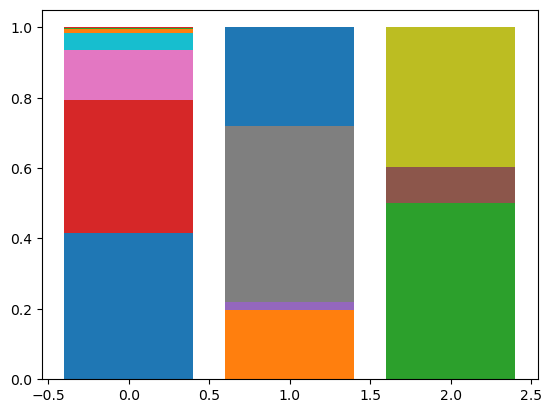

In [63]:
#bar1 = [np.array([float(val) for val in num_iMs_to_ct.values()])]
bar1 = [float(v) for k, v in sorted(num_iMs_to_ct.items(), key = lambda k : -k[1])]
bar2 = [len(all_overlap), len(some_overlap), len(no_overlap), len(iMs_have_no_regs)]
bar3 = np.array([included, cut_due_to_bad_fit, cut_due_to_1_or_fewer_set_size])

bar1 = [val / sum(bar1) for val in bar1]
bar2 = [val / sum(bar2) for val in bar2]
bar3 = [val / sum(bar3) for val in bar3]

i = 0
bottom1 = 0
bottom2 = 0
bottom3 = 0
plt.figure()
while i < len(bar1):
    plt.bar(0, bar1[i], bottom = bottom1)
    bottom1 += bar1[i]
    try:
        plt.bar(1, bar2[i], bottom = bottom2)
        bottom2 += bar2[i]
    except:
        pass
    try:
        plt.bar(2, bar3[i], bottom = bottom3)
        bottom3 += bar3[i]
    except:
        pass
    
    i += 1
plt.savefig('../figures/bar_chart.pdf', transparent = True)
plt.show()

In [64]:
bar1 = [float(v) for k, v in sorted(num_iMs_to_ct.items(), key = lambda k : -k[1])]
bar2 = [len(all_overlap), len(some_overlap), len(no_overlap), len(iMs_have_no_regs)]
bar3 = np.array([included, cut_due_to_bad_fit, cut_due_to_1_or_fewer_set_size])
bar1

[1772.0, 1606.0, 605.0, 204.0, 51.0, 11.0, 6.0, 2.0]

In [67]:
bar3

array([244,  49, 193])

In [65]:
204+51+11+6+2(
)

274

In [ ]:
23742